In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [73]:
class ImagePreprocessor:
    def __init__(self):
        self.folder = "/Users/akhil/Documents/Machine learning/Datasets/Cat vs Dog classifier/train"
        self.dict = {0: 'Cat', 1: ' Dog'}
        self.translated_images = []
    def load_data(self):
        images = []
        for file_name in os.listdir(self.folder):
            if file_name.split(".")[0] == "cat":
                image = cv2.imread(self.folder+"/"+file_name)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append([image, 0])
            else:
                image = cv2.imread(self.folder+"/"+file_name)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append([image, 1])
        return images
    
    def plot_image(self, image):
        print(image)
        plt.imshow(image[0])
        plt.title(self.dict[image[1]])
        plt.show()

    def plot_subplots(self, rows, cols, images):
        fig, ax = plt.subplots(rows, cols, figsize = (10,10))
        axes = ax.ravel()

        for idx, ax in enumerate(axes):
            self.draw_rectangle(images[idx])
            ax.imshow(images[idx][0])
            ax.set_title(images[idx][1])
    
    def draw_rectangle(self,image):
        cv2.rectangle(image[0][0], (200, 200), (400,400), 10, 2)

    def draw_circle(self,image):
        cv2.circle(image[0],(100,100), 100, (255, 0, 0), -1)

    def draw_polygon(self,image):
        pts = np.array([[25, 70], [25, 145],
                [75, 190], [150, 190],
                [200, 145], [200, 70],
                [150, 25], [75, 25]],
               np.int32)
 
        pts = pts.reshape((-1, 1, 2))
 
        cv2.polylines(image[0], pts, False, (255, 0, 0), 8)

    def transform_horizontally(self, image):
        h, w = image[0].shape[:2]
        quarter_h = h/4
        quarter_w = w/4
        M = np.float32([[1,0,quarter_h],[0,1,quarter_w]])
        self.translated_image.append([cv2.warpAffine(image[0], M, (h,w) ), image[1]])
        return self.translated_image

    def transform_rotations(self, image):
        # M the transformation matrix. 
        h, w = image[0].shape[:2]
        M = cv2.getRotationMatrix2D((h/2,w/2), 90, 1)
        self.translated_images.append([cv2.warpAffine(image[0], M, (h,w)),image[1]])
        return self.translated_images
    
    def flip_image(self, image):
        self.translated_images.append([cv2.flip(image[0], -1),image[1]])
        return self.translated_images

    def rescaling(self, image):
        resized_image = cv2.resize(image[0], None, fx= 0.25, fy=0.25)
        self.translated_images.append([cv2.resize(resized_image, None, fx= 2, fy= 2, interpolation=cv2.INTER_AREA),image[1]])
        return self.translated_images

    def image_croping(self, image):
        h, w = image[0].shape[:2]
        start_row, start_col = int(h*0.25), int(w*0.25)
        end_row, end_col = int(h*0.75), int(w*0.75)
        cropped = image[0][start_row:end_row, start_col:end_col]
        self.translated_images.append([cropped,image[1]])

        return self.translated_images

    def image_blur(self, image):
        blurred_images = []
        kernel_3x3 = np.ones((3,3),np.float32) / 9
        kernel_9x9 = np.ones((9,9),np.float32) / 81
        blurred_image = cv2.filter2D(image[0], -1,kernel_9x9)
        plt.imshow(blurred_image)

    def erosion_dilasion_edge_detecton(self,image):
        kernel_size = np.ones((5,5),np.uint8)
        dilate = cv2.dilate(image[0], kernel_size, iterations= 1)
        erode = cv2.erode(image[0], kernel_size, iterations= 1)
        canny = cv2.Canny(image[0],100,200)
        #plt.imshow(dilate)
        #plt.imshow(erode)
        plt.imshow(canny)

    def auto_canny(self, image):
        blurred_image = cv2.blur(image[0], ksize=(6,6))
        med_value = np.median(image[0])
        lower = int(max(0,0.66*med_value))
        upper = int(min(255, 1.33*med_value))
        auto_edges = cv2.Canny(image[0], lower, upper)
        plt.imshow(auto_edges)

In [74]:
preprocessor = ImagePreprocessor()


In [6]:
# load data
images = preprocessor.load_data()

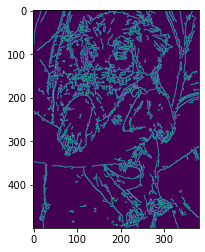

In [75]:
preprocessor.auto_canny(images[0])